In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# LEVEL-3

# Task-1 Restaurant Reviews

**Analyze the text reviews to identify the most common positive and negative keywords**

In [6]:
text_reviews = data['Rating text'].value_counts()
review_df = pd.DataFrame(text_reviews)
review_df

,count
Rating text,
Average,3737
Not rated,2148
Good,2100
Very Good,1079
Excellent,301
Poor,186


In [7]:
sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))
pos_review, neg_review = [], []
text_rating = data['Rating text']
for i in text_rating:
    tokens = word_tokenize(i.lower())
    tokens = [j for j in tokens if j.isalpha() and j not in stop_words]
    sentiment_score = sia.polarity_scores(i)['compound']

    if sentiment_score >= 0.05:
        pos_review.extend(tokens)
    elif sentiment_score < 0.05:
        neg_review.extend(tokens)

pos_counts = Counter(pos_review)
neg_counts = Counter(neg_review)

num_top_keyword = 10
print('Top positive review keywords:')
for keyword, count in pos_counts.most_common(num_top_keyword):
    print(f"{keyword}: {count} times ")
print()

print('Top negative review keywords:')
for keyword, count in neg_counts.most_common(num_top_keyword):
    print(f"{keyword}: {count} times ")

Top positive review keywords:
good: 3179 times 
excellent: 301 times 

Top negative review keywords:
average: 3737 times 
rated: 2148 times 
poor: 186 times 


**Observation**

- Top positive review words are **good** and **excellent**
- Top negative review words are **average**,**rated** and **poor**

**Calculate the average length of reviews and explore if there is a relationship between review length and rating**

In [8]:
rating = data['Rating text'].unique()
rating_len = []
for i in rating:
    rating_len.append(len(i))
d={}
for i in rating:
    d[i] = len(i)

print(d)
data['Rating text_new'] = data['Rating text'].map(d)
avg_rev_len = data.groupby('Aggregate rating')['Rating text_new'].mean()
avg_rev_df = pd.DataFrame(avg_rev_len).reset_index()

{'Excellent': 9, 'Very Good': 9, 'Good': 4, 'Average': 7, 'Not rated': 9, 'Poor': 4}


<Figure size 1300x1000 with 0 Axes>

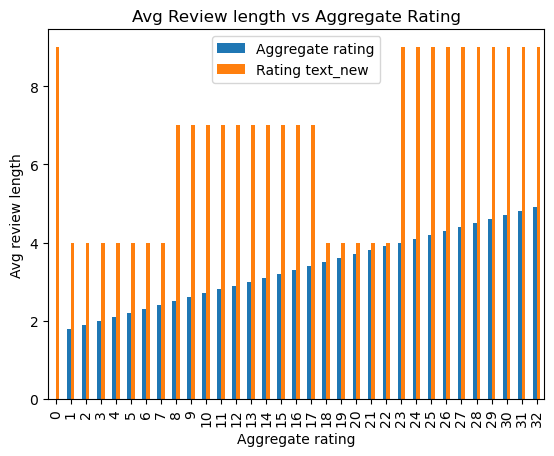

In [9]:
# Plotting graph for reviews and its length
plt.figure(figsize=(13,10))
avg_rev_df.plot(kind='bar')
plt.title('Avg Review length vs Aggregate Rating')
plt.xlabel('Aggregate rating')
plt.ylabel('Avg review length')
plt.show()

**Observation**

- Relation between Agg rating vs Avg Review Text length
    - Agg rating 1.8 to 2.4 - Avg Review Text length-4
    - Agg rating 2.5 to 3.4 - Avg Review Text length-7
    - Agg rating 3.5 to 3.9 - Avg Review Text length-4
    - Agg rating 4.0 to 4.9 - Avg Review Text length-9

# TASK-2 Votes Analysis

**Identify the restaurants with the highest and lowest number of votes**

In [10]:
columns = ['Votes','Restaurant Name']
votes_df = pd.DataFrame(data[columns])
votes_df = votes_df.sort_values(by='Votes')
print('The Restaurant with highest number of votes:')
print(votes_df.tail())

print('The Restaurant with lowest number of votes:')
print(votes_df.head())

The Restaurant with highest number of votes:
      Votes            Restaurant Name
739    6907  AB's - Absolute Barbecues
2412   7574                  Peter Cat
3994   7931           Hauz Khas Social
735    9667                   Truffles
728   10934                       Toit
The Restaurant with lowest number of votes:
      Votes             Restaurant Name
5799      0         Khalsa Eating Point
7411      0   Radha Swami Chaat Bhandar
7414      0  Ram Ram Ji Kachori Bhandar
7415      0          Rana's Food Corner
7416      0         Sanjay Chicken Shop


**Observation**

- The top 5 restaurants with highest votes
    - Toit
    - Truffles
    - Hauz Khas Social
    - Peter Cat
    - AB's - Absolute Barbecues

- The last 5 restaurants with lowest votes
    - Sanjay Chicken Shop
    - Rana's Food Corner
    - Ram Ram Ji Kachori Bhandar
    - Radha Swami Chaat Bhandar
    - Khalsa Eating Point

**Analyze if there is a correlation between the number of votes and the rating of restaurant**

<Axes: >

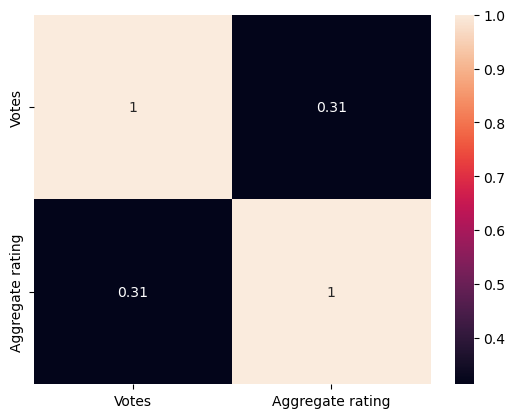

In [11]:
cols = ['Votes','Aggregate rating']
df_corr = data[cols]
correlation = df_corr.corr()
#correlation
sns.heatmap(correlation, annot=True)

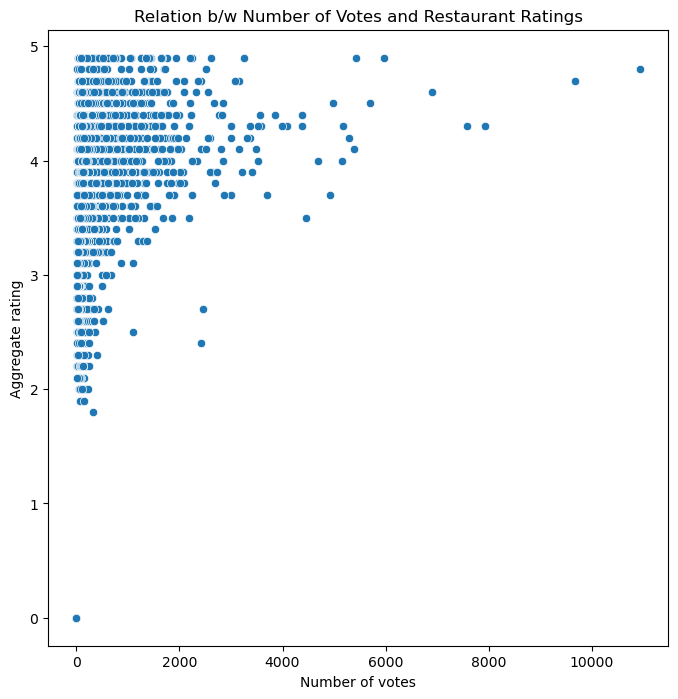

In [12]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Votes', y='Aggregate rating',
               data=df_corr)
plt.title('Relation b/w Number of Votes and Restaurant Ratings')
plt.xlabel('Number of votes')
plt.ylabel('Aggregate rating')
plt.show()

# TASK-3 Price Range vs Online Delivery and Table Booking

**Analyze if there is a relationship between the price range and the avaliability of online delivery and table booking**

In [13]:
columns = ['Price range', 'Has Online delivery', 'Has Table booking']
col_df = data[columns].copy()
# Changing the type of Online delivery and Table booking
d = {'Yes':True, 'No':False}
col_df['Has Online delivery'] = col_df['Has Online delivery'].map(d)
col_df['Has Table booking'] = col_df['Has Table booking'].map(d)
col_df

,Price range,Has Online delivery,Has Table booking
0,3,False,True
1,3,False,True
2,4,False,True
3,4,False,False
4,4,False,True
...,...,...,...
9546,3,False,False
9547,3,False,False
9548,4,False,False
9549,4,False,False


In [14]:
summary_table = pd.pivot_table(col_df, index='Price range',
                              values=['Has Online delivery','Has Table booking'],
                              aggfunc='sum')
print('Summary Table:')
summary_table

Summary Table:


,Has Online delivery,Has Table booking
Price range,,
1,701,1
2,1286,239
3,411,644
4,53,274


<Figure size 1000x800 with 0 Axes>

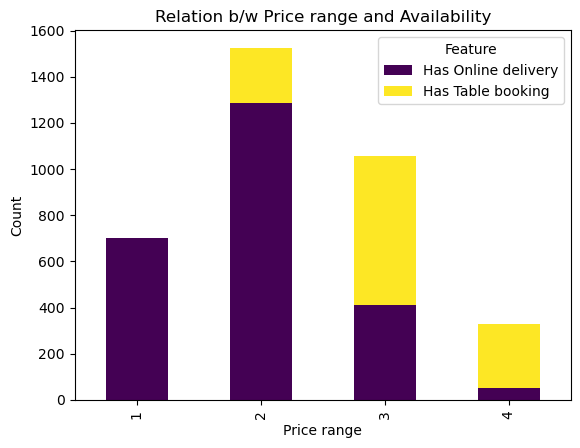

In [15]:
plt.figure(figsize=(10,8))
summary_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Relation b/w Price range and Availability')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.legend(title='Feature', loc='upper right')
plt.show()

**Determine if higher-priced restaurants are more likely to offer these services**

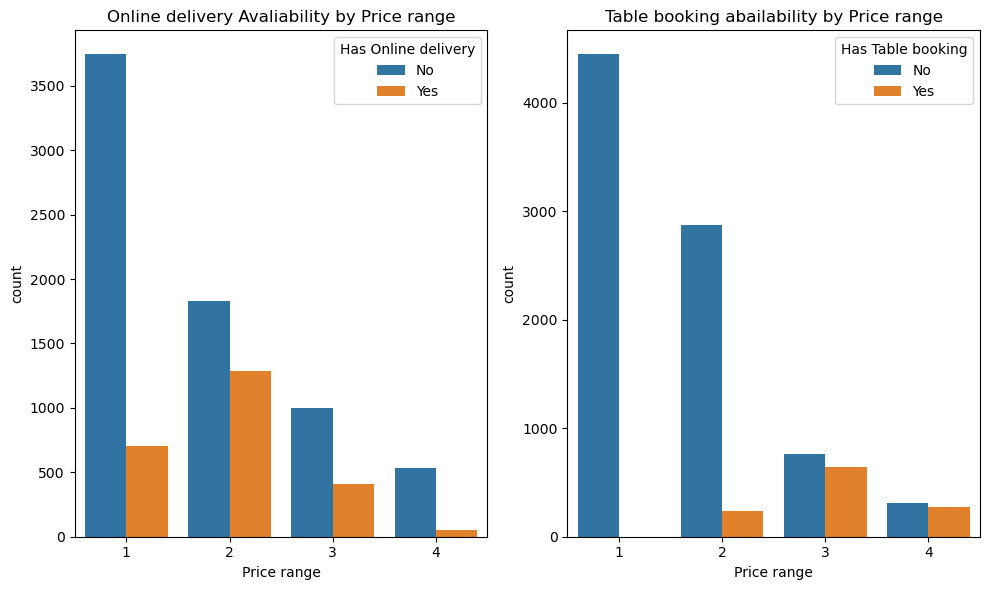

In [16]:
cols = ['Price range','Has Online delivery','Has Table booking']
cols_df = data[cols]
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.countplot(x='Price range', hue='Has Online delivery', data=cols_df)
plt.title('Online delivery Avaliability by Price range')

plt.subplot(1,2,2)
sns.countplot(x='Price range', hue='Has Table booking', data=cols_df)
plt.title('Table booking abailability by Price range')

plt.tight_layout()
plt.show()

**Observation**
    
- The statement 'higher-priced restaurants are most likely to offer these services' is not valid